In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import date
%matplotlib inline
import scipy.stats as stats
import warnings

warnings.filterwarnings('ignore')

In [184]:
#1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data.

In [185]:
claims_data=pd.read_csv('/Users/arunbiretheesh/Desktop/DATA SCIENCE/CASE STUDY/Insurance Claims Case Study 3/claims.csv')
cust_data=pd.read_csv('/Users/arunbiretheesh/Desktop/DATA SCIENCE/CASE STUDY/Insurance Claims Case Study 3/cust_demographics.csv')

In [186]:
cust_claim=pd.merge(left=cust_data,right=claims_data,left_on='CUST_ID',right_on='customer_id')

In [187]:
cust_claim.drop(columns=['customer_id'],inplace=True)

In [188]:
#2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [189]:
cust_claim.dtypes

CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id                 int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [193]:
data=cust_claim.dtypes[cust_claim.dtypes!='object'].index
cust_claim[data]=cust_claim[data].astype('float64')
describe=cust_claim[data].describe().T
missing= pd.DataFrame({'missing':cust_claim[data].isnull().sum()})
audit_float=pd.concat([describe,missing],axis=1)
audit_float

,count,mean,std,min,25%,50%,75%,max,missing
CUST_ID,1085.0,5.076790e+07,2.849625e+07,154557.0,26450621.0,49759488.0,76093960.0,99961993.0,0
claim_id,1085.0,4.891553e+07,2.912818e+07,26832.0,24046062.0,48559754.0,74043997.0,99775483.0,0
total_policy_claims,1075.0,1.586977e+00,1.146859e+00,1.0,1.0,1.0,2.0,8.0,10


In [195]:
def categorical_var_summary( x ):
    
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100 / x.count(), 2)], 
                     
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [202]:
data1=cust_claim.dtypes[cust_claim.dtypes=='object'].index
audit_obj=cust_claim[data1].apply(categorical_var_summary).T
audit_obj

,N,NMISS,MODE,FREQ,PERCENT
gender,1085,0,Male,556,51.24
DateOfBirth,1085,0,11-Mar-84,2,0.18
State,1085,0,NY,31,2.86
Contact,1085,0,915-698-3649,2,0.18
Segment,1085,0,Gold,375,34.56
incident_cause,1085,0,Other causes,285,26.27
claim_date,1085,0,04/04/2018,18,1.66
claim_area,1085,0,Auto,970,89.4
police_report,1085,0,No,621,57.24
claim_type,1085,0,Material only,653,60.18


In [201]:
data_audit=pd.concat([audit_float,audit_obj])
data_audit

,count,mean,std,min,25%,50%,75%,max,missing,N,NMISS,MODE,FREQ,PERCENT
CUST_ID,1085.0,5.076790e+07,2.849625e+07,154557.0,26450621.0,49759488.0,76093960.0,99961993.0,0.0,NaN,NaN,NaN,NaN,NaN
claim_id,1085.0,4.891553e+07,2.912818e+07,26832.0,24046062.0,48559754.0,74043997.0,99775483.0,0.0,NaN,NaN,NaN,NaN,NaN
total_policy_claims,1075.0,1.586977e+00,1.146859e+00,1.0,1.0,1.0,2.0,8.0,10.0,NaN,NaN,NaN,NaN,NaN
gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1085,0,Male,556,51.24
DateOfBirth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1085,0,11-Mar-84,2,0.18
State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1085,0,NY,31,2.86
Contact,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1085,0,915-698-3649,2,0.18
Segment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1085,0,Gold,375,34.56
incident_cause,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1085,0,Other causes,285,26.27
claim_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1085,0,04/04/2018,18,1.66


In [137]:
#3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [138]:
cust_claim['claim_amount']=cust_claim['claim_amount'].astype(str)
cust_claim['claim_amount']=cust_claim['claim_amount'].str.replace('$','')
cust_claim['claim_amount']=cust_claim['claim_amount'].astype('float64')
cust_claim

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873.0,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796.0,Other driver error,09/06/2018,Auto,Yes,Material only,1770.0,1.0,No
1081,42364152.0,Female,07-Jul-96,ID,529-462-1635,Silver,63269067.0,Other causes,05/09/2017,Home,No,Material only,2800.0,1.0,No
1082,19888166.0,Male,11-Apr-90,WI,712-651-9613,Gold,22690595.0,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No
1083,11256802.0,Female,22-Oct-64,LA,469-345-5617,Silver,12376894.0,Other driver error,04/18/2017,Auto,No,Material only,2840.0,4.0,No


In [139]:
#Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [140]:
cust_claim['Flag']=np.where((cust_claim.police_report=='Unknown'),1,0)

In [141]:
cust_claim.CUST_ID.drop_duplicates()

0       21868593.0
1       75740424.0
2       30308357.0
4       47830476.0
6       19269962.0
           ...    
1080    79539873.0
1081    42364152.0
1082    19888166.0
1083    11256802.0
1084    61575264.0
Name: CUST_ID, Length: 1078, dtype: float64

In [142]:
# 5.Retain the most recent observation and delete any duplicated records in the data based on the customer ID column

In [143]:
cust_claim['DateOfBirth']=pd.to_datetime(cust_claim['DateOfBirth'],format='%d-%b-%y')
cust_claim['claim_date']=pd.to_datetime(cust_claim['claim_date'],format='%m/%d/%Y')

recent=cust_claim.sort_values(by='claim_date',ascending=False)
recent.drop_duplicates(subset='CUST_ID',keep='first',inplace=True)
recent

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag
286,93915431.0,Male,2067-09-08,ME,134-785-1687,Gold,99775483.0,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,0
354,38011078.0,Female,1976-05-20,NE,271-123-1475,Gold,98795403.0,Crime,2018-10-30,Auto,Unknown,Material only,1940.0,1.0,No,1
1055,58451506.0,Male,2068-04-22,FL,673-574-7823,Gold,43042986.0,Natural causes,2018-10-30,Auto,No,Material only,2420.0,1.0,No,0
941,46710738.0,Male,1977-04-28,MO,962-834-9361,Gold,74761374.0,Driver error,2018-10-30,Auto,No,Material only,1830.0,1.0,No,0
322,77510822.0,Female,1986-03-18,AK,436-934-7156,Silver,87329176.0,Other driver error,2018-10-30,Auto,Unknown,Material only,NaN,2.0,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,77219712.0,Female,1999-08-05,NH,649-592-8793,Platinum,61374372.0,Other causes,2017-01-01,Auto,No,Material and injury,20200.0,1.0,No,0
905,42664554.0,Female,1993-08-13,TN,396-973-2531,Gold,42280334.0,Other causes,2017-01-01,Auto,No,Injury only,27670.0,1.0,No,0
195,64840478.0,Female,1974-02-14,NM,918-174-7461,Silver,23636125.0,Other driver error,2017-01-01,Auto,Unknown,Material and injury,17290.0,1.0,No,1
177,74155265.0,Male,1985-11-16,TX,392-739-4873,Gold,25647821.0,Natural causes,2017-01-01,Auto,No,Material only,2080.0,1.0,No,0


In [144]:
#6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [145]:
cust_claim.isna().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
Flag                    0
dtype: int64

In [146]:
cust_claim['claim_amount']=np.where(cust_claim.claim_amount.isnull(),cust_claim.claim_amount.mean(),cust_claim.claim_amount)
cust_claim['claim_amount']

0        2980.0
1        2980.0
2        3369.5
3        1950.0
4        1680.0
         ...   
1080     1770.0
1081     2800.0
1082    33080.0
1083     2840.0
1084     1490.0
Name: claim_amount, Length: 1085, dtype: float64

In [147]:
cust_claim['total_policy_claims']=np.where(cust_claim.total_policy_claims.isnull(),cust_claim.total_policy_claims.mode(),cust_claim.total_policy_claims)
cust_claim['total_policy_claims']

0       1.0
1       3.0
2       1.0
3       6.0
4       1.0
       ... 
1080    1.0
1081    1.0
1082    2.0
1083    4.0
1084    1.0
Name: total_policy_claims, Length: 1085, dtype: float64

In [148]:
#7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria60

In [149]:
cust_claim['DateOfBirth']=np.where(cust_claim['DateOfBirth'].dt.year<2021,cust_claim['DateOfBirth'],cust_claim['DateOfBirth']+pd.DateOffset(years=-100))
now=date.today()
cust_claim['Age']=(now.year-cust_claim['DateOfBirth'].dt.year)-((now.month-cust_claim['DateOfBirth'].dt.month)<0)
cust_claim['Category']=pd.cut(cust_claim.Age,[0,19,31,61,100],labels=['Children','Youth','Adult','Senior'])
cust_claim

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag,Age,Category
0,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0,42,Adult
1,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,1,51,Adult
2,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0,37,Adult
3,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0,37,Adult
4,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0,35,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873.0,Female,1981-03-15,ND,459-425-4319,Platinum,62020796.0,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,0,40,Adult
1081,42364152.0,Female,1996-07-07,ID,529-462-1635,Silver,63269067.0,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,0,25,Youth
1082,19888166.0,Male,1990-04-11,WI,712-651-9613,Gold,22690595.0,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,0,31,Youth
1083,11256802.0,Female,1964-10-22,LA,469-345-5617,Silver,12376894.0,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,0,57,Adult


In [150]:
#8. What is the average amount claimed by the customers from various segments?

In [151]:
seg_avg=cust_claim.groupby('Segment')['claim_amount'].mean().reset_index()
seg_avg

,Segment,claim_amount
0,Gold,12829.631974
1,Platinum,12341.952267
2,Silver,12208.435570


In [152]:
#9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018?

In [153]:
october='1/10/2018'
aa=pd.to_datetime(october,format='%d/%m/%Y')+pd.DateOffset(days=-20)
tot_claim=cust_claim.loc[cust_claim['claim_date']<=aa,['claim_date','claim_amount']]
tot_claim.claim_amount.mean()

12477.1388527242

In [154]:
#10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [155]:
cust_claim.incident_cause.value_counts()

Other causes          285
Driver error          261
Other driver error    245
Natural causes        186
Crime                 108
Name: incident_cause, dtype: int64

In [156]:
driver=cust_claim.loc[((cust_claim.incident_cause=='Driver error')|(cust_claim.incident_cause=='Other driver error'))&(cust_claim.Category=='Adult')&((cust_claim.State=='TX')|(cust_claim.State=='DE')|(cust_claim.State=='AK')),['State','Category','incident_cause']]
print('Total no of adults are: ',driver.Category.count())

Total no of adults are:  27


In [157]:
#11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

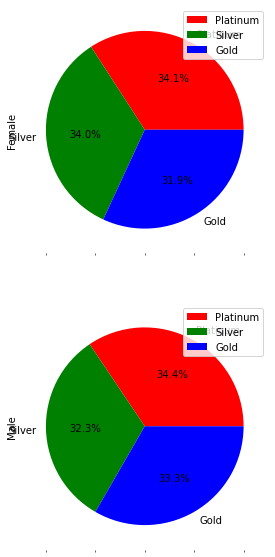

In [158]:
pd.pivot_table(cust_claim, index =['Segment'],columns ='gender',values ='claim_amount').plot.pie(labels=['Platinum','Silver','Gold'],colors=['r', 'g', 'b'],autopct='%.1f%%',subplots=True,figsize=(10,10),layout=(2,1))
plt.show()

In [159]:
#12.Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [160]:
gender=cust_claim.loc[((cust_claim.incident_cause=='Driver error')|(cust_claim.incident_cause=='Other driver error')),['gender','claim_amount','incident_cause']]
bb=gender.groupby(['gender'])['claim_amount'].sum()
bb


gender
Female    3.139645e+06
Male      4.017650e+06
Name: claim_amount, dtype: float64

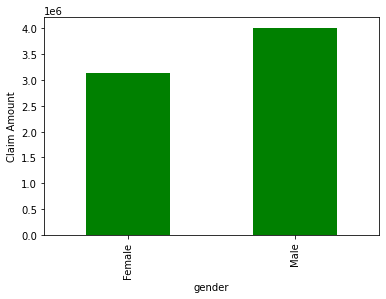

In [161]:
bar=bb.plot.bar(color='green')
bar.set_ylabel('Claim Amount')
plt.show()

In [162]:
#13.Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

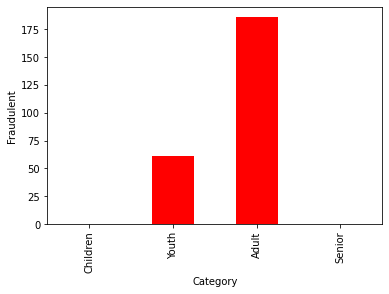

In [163]:
fraud=cust_claim.loc[cust_claim.fraudulent=='Yes']
fraud_cat=fraud.groupby('Category')['fraudulent'].count()
fraud_cat.plot.bar(color='red').set_ylabel('Fraudulent')
plt.show()


In [164]:
#14.Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

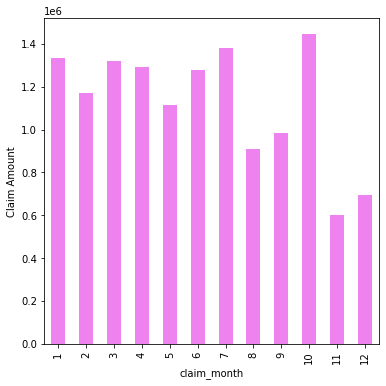

In [165]:
trend=cust_claim.loc[:,['claim_date','claim_amount']]
trend['claim_month']=cust_claim.claim_date.dt.month
month_trend=trend.groupby('claim_month')['claim_amount'].sum()
month_trend.plot.bar(color='violet',figsize=(6,6)).set_ylabel('Claim Amount')
plt.show()

In [166]:
#15.What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

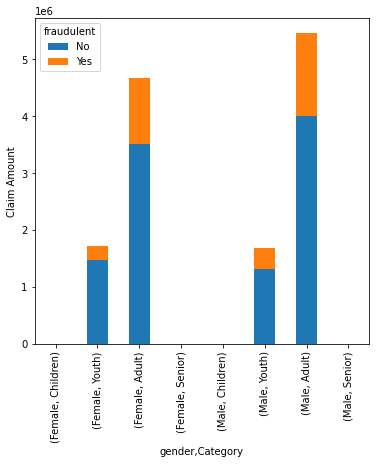

In [167]:
cust_claim.pivot_table(index=['gender','Category'],columns='fraudulent',values='claim_amount',aggfunc='sum').plot(kind='bar',stacked=True,figsize=(6,6))
plt.ylabel('Claim Amount')
plt.show()

In [168]:
#16.Is there any similarity in the amount claimed by males and females?

In [169]:
usage_variable='claim_amount'
male_spend=cust_claim.loc[cust_claim.gender=='Male',usage_variable]
female_spend=cust_claim.loc[cust_claim.gender=='Female',usage_variable]
print( 'mean male spend: ', male_spend.mean(), '| mean female spend: ', female_spend.mean(), '\n' )

mean male spend:  12853.058506136278 | mean female spend:  12062.634706623674 



In [170]:
#H0 :u1=u2
#Ha :u1<>u2
    
# CI = 95%, p = 0.05
#perform the test - ind ttest
print( stats.ttest_ind( male_spend, female_spend ) )

# based on p values, p value of the test is higher compared to cutoff p at 95%; 
# thus we will fail to reject the H0

# perform the test - ftest
print( stats.f_oneway( male_spend, female_spend ) )

#business conclusion
#there is no similarity between male and female spend in amount claimed.

Ttest_indResult(statistic=0.9738138415066818, pvalue=0.33036643165116597)
F_onewayResult(statistic=0.9483133979100016, pvalue=0.33036643165098045)


In [171]:
#17.Is there any relationship between age category and segment?

In [172]:
#Ho :no relationship exist
#Ha :Relationship exist

#C.I=95%,p=0.05
#create a obs table

obs=pd.crosstab(cust_claim.Segment,cust_claim.Category)

#perform the test

stats.chi2_contingency(observed=obs)

#based on p values,p value of the test is large when compared to the cutoff p at 95%;
#thus we fail to reject Ho

#business conclusion

#there is no relationship between age category and segment




(3.2196409767413225,
 0.1999234994472562,
 2,
 array([[ 98.50230415, 276.49769585],
        [ 95.0875576 , 266.9124424 ],
        [ 91.41013825, 256.58986175]]))

In [173]:
#18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [174]:
yr=cust_claim.loc[:,['claim_date','claim_amount']]
yr['Year']=cust_claim.claim_date.dt.year
yr_amt=yr.loc[yr.Year==2018,usage_variable]
yr_amt


1        2980.0
2        3369.5
3        1950.0
4        1680.0
6        2680.0
         ...   
1073     2730.0
1074    33330.0
1075     2780.0
1077     2290.0
1080     1770.0
Name: claim_amount, Length: 487, dtype: float64

In [175]:
print('Mean of the current year claim amount: ',yr_amt.mean(), '\n')
#Ho :u<>10000
#Ha :u>10000

#C.I=95%,p=0.05
#perform the test

stats.ttest_1samp(yr_amt,popmean=10000)
#based on p value,the p value of the test is  small when compared to cutoff p at C.I :95%
#therefore we reject null hypothesis

#Business Conclusion
#therefore The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average.

Mean of the current year claim amount:  12701.14818617386 



Ttest_1sampResult(statistic=4.421788475402985, pvalue=1.2086880225728461e-05)

In [176]:
#19. Is there any difference between age groups and insurance claims?

In [177]:
cust_claim.groupby('Category')['claim_amount'].sum()

Category
Children    0.000000e+00
Youth       3.402735e+06
Adult       1.012470e+07
Senior      0.000000e+00
Name: claim_amount, dtype: float64

In [178]:
age_cat1=cust_claim.loc[cust_claim.Category=='Youth',usage_variable]
age_cat2=cust_claim.loc[cust_claim.Category=='Adult',usage_variable]
print('the mean of Youth claimed amount :',age_cat1.mean() ,'|the mean of Adult claimed amount :',age_cat2.mean() )


the mean of Youth claimed amount : 11939.42022703818 |the mean of Adult claimed amount : 12655.874405637267


In [179]:
#Ho :u1=u2
#Ha :u1<>u2

#C.I=95%,p=0.05

#perform the ttest

stats.ttest_ind(age_cat1,age_cat2)

#Based on p value,p value is large compared to cutoff p at C.I=95%
#therefor we fail to reject null hypothesis

#Business Conclusion

#Therefore,there is no difference between age groups and insurance claims or No influence of age groups on insurance claims



Ttest_indResult(statistic=-0.7770295126428923, pvalue=0.4373110429181546)

In [180]:
#20.Is there any relationship between total number of policy claims and the claimed amount?

In [181]:
# H0 - No relationship
# Ha - Relationship exists
# 
# CI - 95%, p - 0.05

# perform the test
stats.pearsonr(cust_claim.total_policy_claims,cust_claim.claim_amount)

#Based on p value,p value is large compared to cutoff p at C.I=95%
#therefor we fail to reject null hypothesis

#Business Conclusion

#therefore there is no corelation between total number of policy claims and the claimed amount




(-0.017952953318902985, 0.5547051246400856)

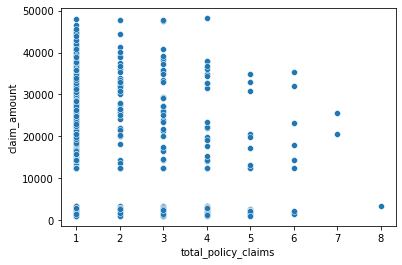

In [182]:
sns.scatterplot(cust_claim.total_policy_claims,cust_claim.claim_amount)
plt.show()